YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Test Set Mean Squared Error: 401.35


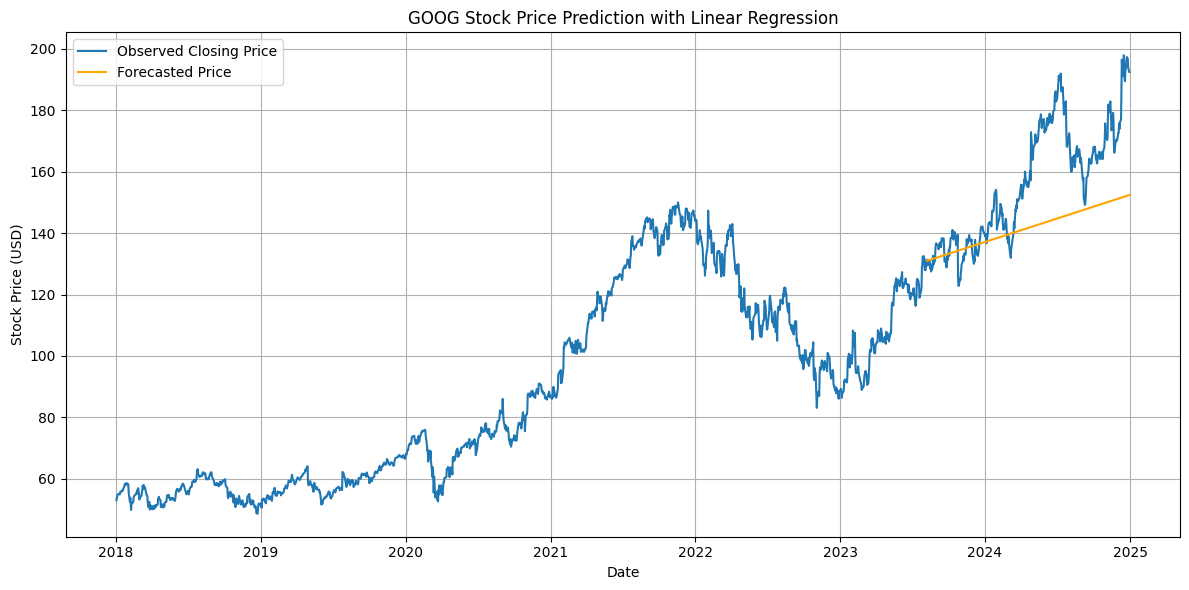

In [1]:
# Stock Price Forecast using Linear Regression

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetch historical stock prices
symbol = 'GOOG'  # Replace with other symbols as needed, e.g., 'AAPL', 'MSFT'
data = yf.download(symbol, start='2018-01-01', end='2024-12-31')
closing_prices = data[['Close']].copy()
closing_prices.dropna(inplace=True)
closing_prices.reset_index(inplace=True)

# Convert date to numeric format (days since start)
start_date = closing_prices['Date'].min()
closing_prices['Elapsed_Days'] = (closing_prices['Date'] - start_date).dt.days

# Define input (X) and target (y) variables
X_values = closing_prices[['Elapsed_Days']]
y_values = closing_prices['Close']

# Preserve temporal sequence during the train-test split
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    X_values, y_values, test_size=0.2, shuffle=False
)

# Initialize and train the regression model
lr_model = LinearRegression()
lr_model.fit(X_train_set, y_train_set)

# Generate predictions on the test portion
predicted_prices = lr_model.predict(X_test_set)

# Calculate and display prediction error
mse_score = mean_squared_error(y_test_set, predicted_prices)
print(f"Test Set Mean Squared Error: {mse_score:.2f}")

# Visualize the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices['Date'], closing_prices['Close'], label='Observed Closing Price')
plt.plot(closing_prices['Date'].iloc[len(X_train_set):], predicted_prices,
         label='Forecasted Price', color='orange')
plt.title(f"{symbol} Stock Price Prediction with Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()